# About the Dataset

### Context
http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5


Figure S6. Illustrative Examples of Chest X-Rays in Patients with Pneumonia, Related to Figure 6
The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia (middle) typically exhibits a focal lobar consolidation, in this case in the right upper lobe (white arrows), whereas viral pneumonia (right) manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.
http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

### Content
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

### Acknowledgements
Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

License: CC BY 4.0

Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

enter image description here

Inspiration
Automated methods to detect and classify human diseases from medical images.

Dataset: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\default.ASUS\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [3]:
import os
from PIL import Image

train = "C:/Users/default.ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/train"
test = "C:/Users/default.ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/test"
val = "C:/Users/default.ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/val"

NORMAL images: 1342
PNEUMONIA images: 3876


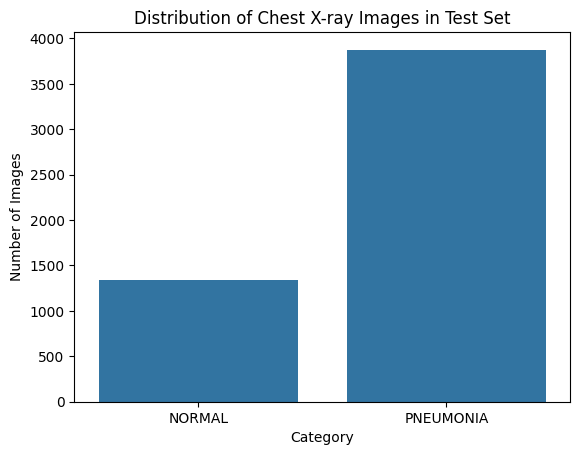

In [4]:
categories = ['NORMAL', 'PNEUMONIA']
data = []

for category in categories:
    category_path = os.path.join(train, category)
    num_images = len(os.listdir(category_path))
    print(f'{category} images: {num_images}')
    data.append({"label": category, "count": num_images})

df = pd.DataFrame(data)

sns.barplot(data=df, x="label", y="count")
plt.title("Distribution of Chest X-ray Images in Test Set")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.show()

The data is imbalanced, with more pneumonia images than normal images. This imbalance can be addressed by using data augmentation techniques or by using a balanced dataset.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation transformations
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values (0-1)
    rotation_range=30,       # Rotate images up to 30 degrees
    width_shift_range=0.2,   # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Zoom in/out
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'      # Fill missing pixels with nearest values
)

# Load training images with augmentation
train_data = train_datagen.flow_from_directory(
    "C:/Users/default.ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.


Displaying the original images

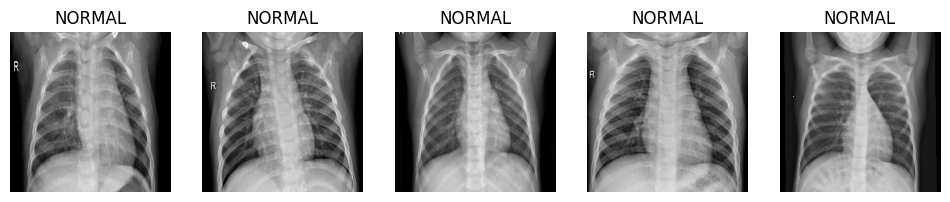

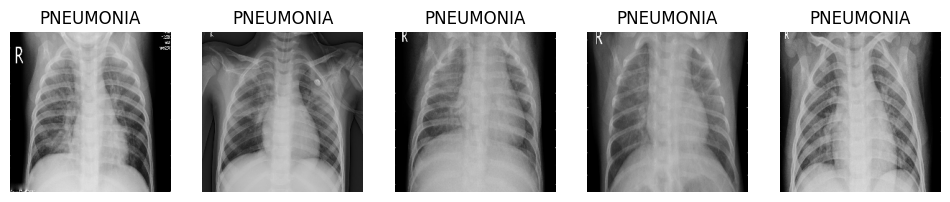

In [6]:
import matplotlib.pyplot as plt
import os
import cv2
import random

# Define paths to NORMAL & PNEUMONIA images
test_dir = "C:/Users/default.ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/test"
categories = ["NORMAL", "PNEUMONIA"]

# Function to show images
def display_images(category, num_images=5):
    folder_path = os.path.join(test_dir, category)
    image_files = random.sample(os.listdir(folder_path), num_images)  # Pick random images

    plt.figure(figsize=(12, 6))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
        img = cv2.resize(img, (224, 224))  # Resize to 224x224

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        plt.title(category)

    plt.show()

# Show NORMAL images
display_images("NORMAL")

# Show PNEUMONIA images
display_images("PNEUMONIA")


Displaying augmented images

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset paths
train_dir = "C:/Users/default.ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/train"
val_dir = "C:/Users/default.ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/val"
test_dir = "C:/Users/default.ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/test"

# Image size for CNN input
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values (0-1)
    rotation_range=30,       # Rotate images randomly
    width_shift_range=0.2,   # Shift width
    height_shift_range=0.2,  # Shift height
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Zoom in/out
    horizontal_flip=True,    # Flip images horizontally
    fill_mode='nearest'
)

# Only rescale validation & test data (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Binary classification: NORMAL vs PNEUMONIA
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Build CNN model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Flatten layer
    Flatten(),

    # Fully connected layers
    Dense(512, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(1, activation='sigmoid')  # Binary classification (NORMAL vs PNEUMONIA)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,265,729 (73.49 MB)

 Trainable params: 19,264,769 (73.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [12]:
EPOCHS = 10

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


C:\Users\default.ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 704s 4s/step - accuracy: 0.8140 - loss: 2.0491 - val_accuracy: 0.5000 - val_loss: 181.8579
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 646s 4s/step - accuracy: 0.8735 - loss: 0.3304 - val_accuracy: 0.5000 - val_loss: 52.5981
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 646s 4s/step - accuracy: 0.8691 - loss: 0.3254 - val_accuracy: 0.5000 - val_loss: 127.8298
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 635s 4s/step - accuracy: 0.8877 - loss: 0.2671 - val_accuracy: 0.5000 - val_loss: 14.8092
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 665s 4s/step - accuracy: 0.8976 - loss: 0.2583 - val_accuracy: 0.5000 - val_loss: 3.8904
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 603s 4s/step - accuracy: 0.8988 - loss: 0.2251 - val_accuracy: 0.5000 - val_loss: 41.3768
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 644s 4s/step - accuracy: 0.9142 - loss: 0.2128 - val_accuracy: 0.6250 - val_loss: 1.2036
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 646s 4s/step - accuracy: 0.9149 - loss: 0.2289 - v

In [13]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 846ms/step - accuracy: 0.7068 - loss: 1.4162
Test Accuracy: 39.58%


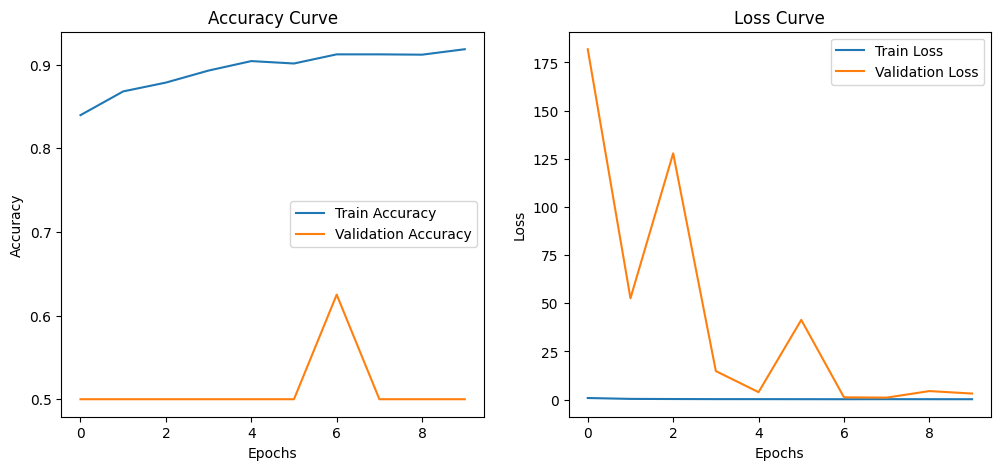

In [14]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.show()


In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers (prevent retraining)
for layer in base_model.layers:
    layer.trainable = False

# Build model with pretrained base
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model with lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Display model architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,560,769 (105.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
EPOCHS = 20

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=[early_stop]
)


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 548s 3s/step - accuracy: 0.8233 - loss: 0.4389 - val_accuracy: 0.8125 - val_loss: 0.3089
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 519s 3s/step - accuracy: 0.9183 - loss: 0.2004 - val_accuracy: 0.8125 - val_loss: 0.3774
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 509s 3s/step - accuracy: 0.9214 - loss: 0.1892 - val_accuracy: 0.7500 - val_loss: 0.5005
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 524s 3s/step - accuracy: 0.9291 - loss: 0.1801 - val_accuracy: 0.8125 - val_loss: 0.3210


In [17]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.8678 - loss: 0.3306
Test Accuracy: 87.98%


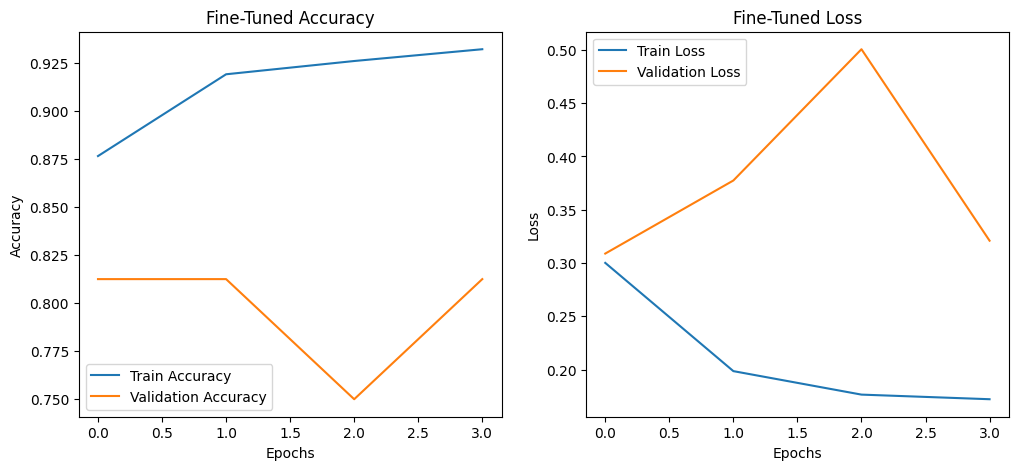

In [18]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Fine-Tuned Accuracy")

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Fine-Tuned Loss")

plt.show()


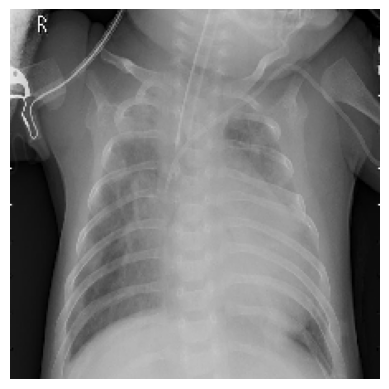

In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load a new X-ray image (Replace with your image path)
img_path = "C:/Users/default.ASUS/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg"

# Preprocess the image
img = load_img(img_path, target_size=(224, 224))  # Resize to match model input
img_array = img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize (same as training images)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()


In [21]:
# Get model prediction
prediction = model.predict(img_array)

# Convert prediction to label
label = "PNEUMONIA" if prediction[0][0] > 0.5 else "NORMAL"

print(f"Prediction: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
Prediction: PNEUMONIA


20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step
              precision    recall  f1-score   support

      NORMAL       0.84      0.84      0.84       234
   PNEUMONIA       0.90      0.91      0.90       390

    accuracy                           0.88       624
   macro avg       0.87      0.87      0.87       624
weighted avg       0.88      0.88      0.88       624



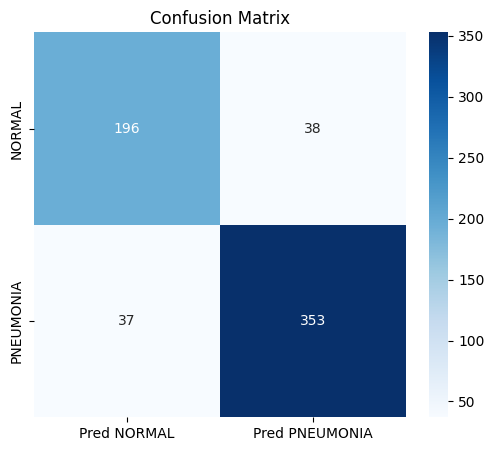

In [22]:
# Get predictions for the entire test set
predictions = model.predict(test_data)

# Convert probabilities to class labels (0 = Normal, 1 = Pneumonia)
predicted_labels = (predictions > 0.5).astype(int)

# Get actual labels
actual_labels = test_data.classes

# Compare predictions with actual labels
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(actual_labels, predicted_labels, target_names=['NORMAL', 'PNEUMONIA']))

# Display confusion matrix
import seaborn as sns
import pandas as pd
import itertools

cm = confusion_matrix(actual_labels, predicted_labels)
df_cm = pd.DataFrame(cm, index=['NORMAL', 'PNEUMONIA'], columns=['Pred NORMAL', 'Pred PNEUMONIA'])

plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
